### Import your librares

In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load your dataset

In [43]:
df = pd.read_csv('seattle_weather.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Handle missing data in PRCP and RAIN columns

In [44]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [45]:
df[df['PRCP'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


### PRCP and RAIN Column

In [46]:
PRCP_perc = df['PRCP'].isnull().mean()
PRCP_perc = "{:%}".format(PRCP_perc)
print(PRCP_perc)

0.011741%


In [47]:
RAIN_perc = df['RAIN'].isnull().mean()
RAIN_perc = "{:%}".format(RAIN_perc)
print(RAIN_perc)

0.011741%


In [48]:
df.dropna(subset=['PRCP'], inplace=True)

In [49]:
df.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


In [6]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


### PRCP Column

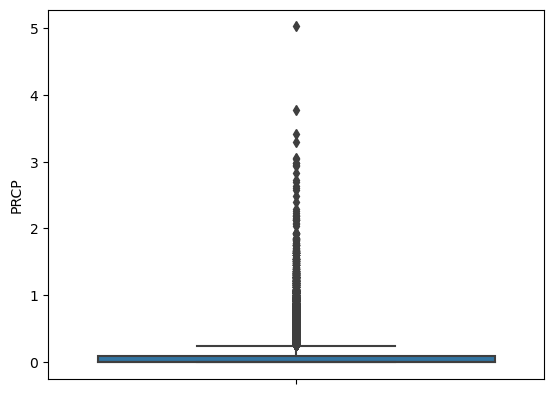

In [7]:
sns.boxplot(y=df['PRCP'])
plt.show()

In [8]:
Q1 = df['PRCP'].quantile(0.25)
Q3 = df['PRCP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['PRCP'] >= lower_bound) & (df['PRCP'] <= upper_bound)]

In [9]:
df['PRCP'].describe()

count    21990.000000
mean         0.030501
std          0.059203
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030000
max          0.250000
Name: PRCP, dtype: float64

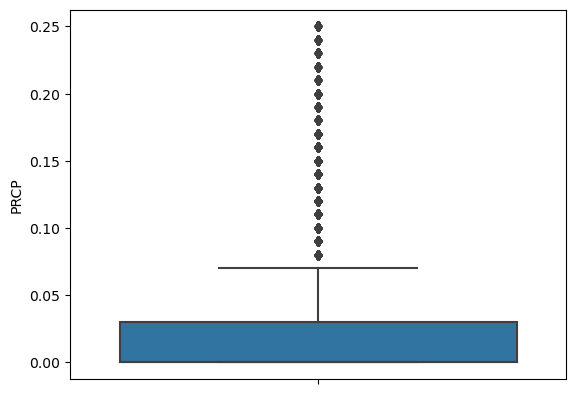

In [10]:
sns.boxplot(y=df['PRCP'])
plt.show()

### TMAX Column

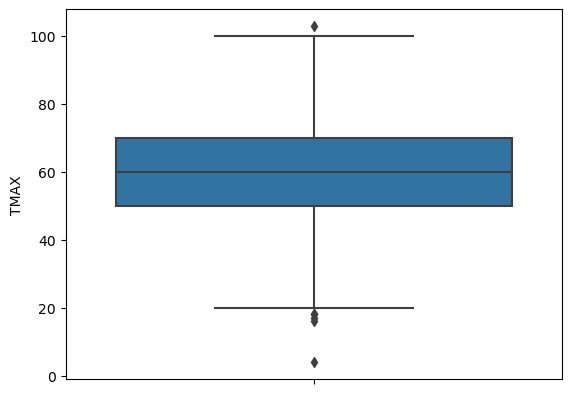

In [11]:
sns.boxplot(y=df['TMAX'])
plt.show()

In [12]:
Q1 = df['TMAX'].quantile(0.25)
Q3 = df['TMAX'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['TMAX'] >= lower_bound) & (df['TMAX'] <= upper_bound)]

In [13]:
df['TMAX'].describe()

count    21984.000000
mean        60.665166
std         13.088963
min         20.000000
25%         50.000000
50%         60.000000
75%         70.000000
max        100.000000
Name: TMAX, dtype: float64

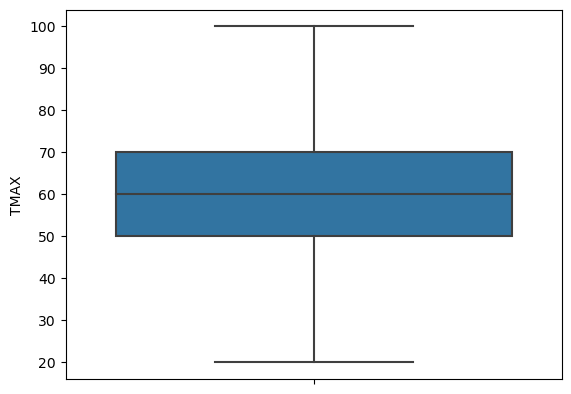

In [14]:
sns.boxplot(y=df['TMAX'])
plt.show()

### TMIN Column

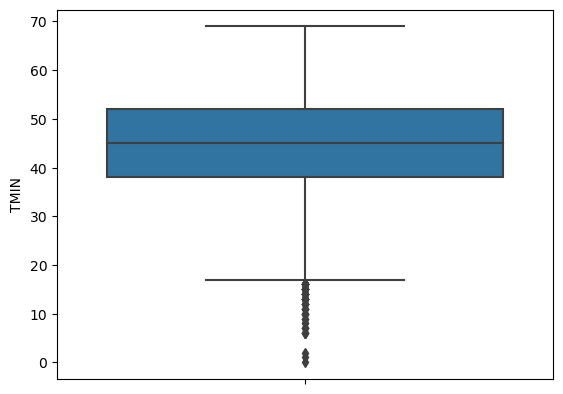

In [15]:
sns.boxplot(y=df['TMIN'])
plt.show()

In [16]:
Q1 = df['TMIN'].quantile(0.25)
Q3 = df['TMIN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['TMIN'] >= lower_bound) & (df['TMIN'] <= upper_bound)]

In [17]:
df['TMIN'].describe()

count    21900.000000
mean        44.884612
std          8.944827
min         17.000000
25%         38.000000
50%         45.000000
75%         52.000000
max         69.000000
Name: TMIN, dtype: float64

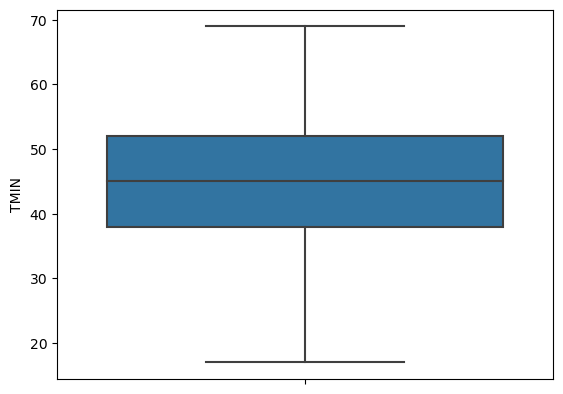

In [18]:
sns.boxplot(y=df['TMIN'])
plt.show()

### All Columns

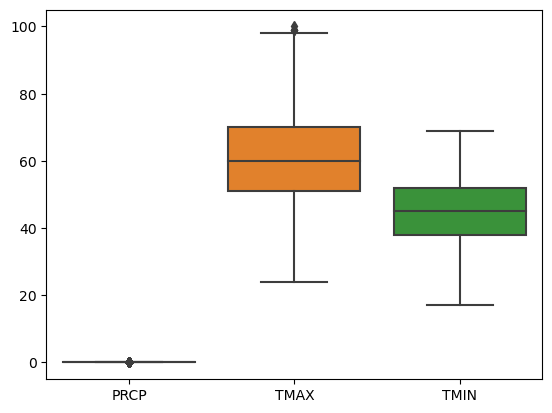

In [19]:
sns.boxplot(df[['PRCP','TMAX','TMIN']])
plt.show()